# RECOMMENDATION ENGINES - AMAZON TOYS AND GAMES

## GROUP C
- Nikolas Artadi
- Camila Vasquez
- Assemgul Khametova
- Miguel Frutos

## TASK
- **DATA SELECTION AND PRE-PROCESSING**(Mandatory)
First, you need to select a product category (from the “Small subsets for experiment”) and download the related file to create a training dataset and a testing dataset for the experiment. A recommended standard pre-processing strategy is that: each user randomly selects 80% of their ratings as the training ratings and uses the remaining 20% ratings as testing ratings.
- **COLLABORATIVE FILTERING RECOMMENDER SYSTEM** (Mandatory)
Based on the training dataset, you should develop a Collaborative Filtering model/algorithm to predict the ratings in the testing set. You may use any existing algorithm implemented in Surprise (or any other library) or develop new algorithms yourself. After predicting the ratings in the testing set, evaluate your predictions by calculating the RMSE.
- **CONTENT-BASED RECOMMENDER SYSTEM** (Mandatory)You should leverage the textual
information related to the reviews to create a Content-based RS to predict the ratings for the users in the test set. I do recommend you make use of the lab session related to the topic.
- **HYBRID HS**(Optional)
As an extra, you can propose a hybrid recommender system joining the operation of the two previously developed systems. To that end, you can make use of any of the ideas explained in class.
    
## DATASET
We follow the data set Toys and Games in the following [source](http://deepyeti.ucsd.edu/jianmo/amazon/index.html).

### Ratings only features explanation
- **reviewerID/user-id** - ID of the reviewer, e.g. A2SUAM1J3GNN3B
- **asin/product-id** - ID of the product, e.g. 0000013714
- **reviewerName** - name of the reviewer
- **helpful/helpfulness** - helpfulness rating of the review, e.g. 2/3 [#users that think this review is not helpful,
#users that think this review is helpful]
- **reviewText/review** - text of the review
- **overall/rating** - rating of the product
- **summary/title** - summary of the review
- **unixReviewTime/timestamp** - time of the review (unix time)
- **reviewTime** - time of the review (raw)
    
### Product Metadata set
- **asin** - ID of the product, e.g. 0000031852
- **title** - name of the product
- **feature** - bullet-point format features of the product
- **description** - description of the product
- **price** - price in US dollars (at time of crawl)
- **imageURL** - url of the product image
- **imageURL** - url of the high resolution product image
- **related** - related products (also bought, also viewed, bought together, buy after viewing)
- **salesRank** - sales rank information
- **brand** - brand name
- **categories** - list of categories the product belongs to
- **tech1** - the first technical detail table of the product
- **tech2** - the second technical detail table of the product
- **similar** - similar product table

# LET´S GET STARTED

 ## LIBRARIES INSTALATION

In [2]:
# ! pip install scikit-surprise
# ! pip install plotly
# ! pip install seaborn

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

from surprise import SVDpp
from surprise import SVD
from surprise import KNNBaseline
from surprise import SVDpp
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import SlopeOne




from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt

## READ DATA

In [14]:
# df = pd.read_json('game_toy.json',lines=True)

# Ratings data
original = pd.read_json('/Users/niko/Desktop/Recommnedation systems/project/ratings_game_toy.json',lines=True)

# Games and Toys description
meta_game_toy = pd.read_json('/Users/niko/Desktop/Recommnedation systems/project/meta_Toys_and_Games.json',lines=True)

# Merge both datasets together to facilitate their use
df_merged = pd.merge(original, meta_game_toy, on='asin', how='inner')


# Split dataset into trainset and testset at 80% for training of the total data
trainset, testset = train_test_split(df_merged, train_size=0.80,random_state=42)

df = trainset

# test_dataset.to_json('test_dataset.json')

In [15]:
# Take a random sample of the df for faster iteration through the code
# For testing the code utilize 10% of the total sample and it should yield the same results as in the markdown
df = df.sample(frac=0.05, random_state=5)

## ANALYZE THE DATA

Take a quick look at the data to check if the dataset is correctly uploaded and to understand the variable´s content and the schema.

In [16]:
df.shape

(4896, 27)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4896 entries, 10379 to 21888
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reviewerID       4896 non-null   object
 1   asin             4896 non-null   object
 2   reviewerName     4878 non-null   object
 3   helpful          4896 non-null   object
 4   reviewText       4896 non-null   object
 5   overall          4896 non-null   int64 
 6   summary          4896 non-null   object
 7   unixReviewTime   4896 non-null   int64 
 8   reviewTime       4896 non-null   object
 9   category         4896 non-null   object
 10  tech1            4896 non-null   object
 11  description      4896 non-null   object
 12  fit              4896 non-null   object
 13  title            4896 non-null   object
 14  also_buy         4896 non-null   object
 15  tech2            4896 non-null   object
 16  brand            4896 non-null   object
 17  feature          4896 non-nu

In [18]:
df.describe()
# We can see that the ratings have min of 1 and max of 5

,overall,unixReviewTime
count,4896.000000,4.896000e+03
mean,4.308619,1.342305e+09
std,1.018188,7.119337e+07
min,1.000000,9.722592e+08
25%,4.000000,1.326629e+09
50%,5.000000,1.363867e+09
75%,5.000000,1.387519e+09
max,5.000000,1.406074e+09


In [19]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
10379,A2Z60PVKWFO3SW,B00005MP02,"Learning All The Time ""It's Never Too Late to...","[0, 0]",My whole family enjoys this simple vocabulary ...,5,Great Family Game,1226793600,"11 16, 2008","[Toys & Games, Games, Board Games]",...,"[Team or individual play, Thirty-six starting ...","[>#296,422 in Toys & Games (See Top 100 in Toy...","[B004Y82AG6, B001QOGXPK, B00ALQFYGI, B004INGVH...",Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,$59.99,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
81570,A2MRH36J6P1IQH,B0064Z54Z6,scottw,"[0, 0]",My 5 and 3 year olds have a little trouble pus...,5,"cool toys, but a little tough for very young h...",1398470400,"04 26, 2014","[Toys & Games, Building Toys, Building Sets]",...,[The assortment of pieces allows you to build ...,"[>#402,619 in Toys & Games (See Top 100 in Toy...","[B0064Z550U, B00KH6DYXM, B00KH6BQJG, B0048EKSL...",Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,$48.39,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
48254,AN0ILVRWZUV4E,B001N4RAJG,Amazon Customer,"[0, 0]","Hey It's Sunnydale Chick, I'm Back....it was l...",5,And He Has The Power!,1385942400,"12 2, 2013","[Toys & Games, Action Figures & Statues, Actio...",...,[MOTU],"[>#258,924 in Toys & Games (See Top 100 in Toy...",[],Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,$188.00,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
53886,AF9AF3GCFXXYD,B0028K2Q8O,RDS,"[0, 0]",We played this with our almost 6 year old and ...,5,Fun game,1380672000,"10 2, 2013","[Toys & Games, Games, Board Games]",...,"[Trick or Treat with the Peanuts Pals, Fun for...","[>#680,198 in Toys & Games (See Top 100 in Toy...","[B001E2D4WE, B01ISKTDLA, B07GJYBD9C, B011GK738...",Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,$73.99,[],[],{}
76559,A3SIFPKLMOY07N,B005E7A202,Richard Aubin,"[5, 5]","At its core, this is really two reviews - pare...",4,Cartoonish Campfire Captures the Kids' Imagina...,1323907200,"12 15, 2011","[Toys & Games, Dress Up & Pretend Play, Preten...",...,"[No-heat fire light, Looks real/feels cool, Gl...","[>#528,086 in Toys & Games (See Top 100 in Toy...","[B009ZWTAPA, B005E7A21Q, B00T83WRK6]",Toys & Games,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90054,A5NY78TDV87VO,B007HVGD6K,Jewelry Lover,"[0, 0]",Goes well with the Servin Surprises table. The...,4,Cute set.,1357344000,"01 5, 2013","[Toys & Games, Dress Up & Pretend Play, Preten...",...,[Contains magical features to be used alone or...,"[>#426,198 in Toys & Games (See Top 100 in Toy...",[],Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,$22.75,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
51805,A19BSL8DK1YT87,B001W2WKS0,M. Alver,"[0, 0]",I bought one of these for my little boy who ju...,5,Very good idea to teach child to write letters.,1262044800,"12 29, 2009","[Toys & Games, Kids' Electronics, Electronic L...",...,"[Trace the lights to learn how to write, New w...","[>#7,549 in Toys & Games (See Top 100 in Toys ...",[],Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
117862,A1XWX7QTBR3UPV,B00EAHY1QS,Wendy G,"[0, 1]",Nerf Super Soaker Barrage Soaker arrived inste...,3,Did not recieve listed item,1400112000,"05 15, 2014","[Toys & Games, Sports & Outdoor Play, Pools & ...",...,[Tri Strike Crossbow soaker has deployable cro...

We have included an EDA and have identified duplicates and missing data which we will handle in the next steps.

In [20]:
def missing_values_percentage(df):
    """Return the % of missing values for each pd.series inside the Dataframe"""
    for i in df:
        missing_values_percentage = 100*df.isnull().sum()/df.isnull().count()
    return (missing_values_percentage[missing_values_percentage > 0]) 

In [21]:
missing_values_percentage(df)

reviewerName    0.367647
details         0.898693
dtype: float64

In [22]:
#Count Reviewers´s number of evaluation
df.value_counts('reviewerID')

reviewerID
AJGU56YG8G1DQ     12
A1POFVVXUZR3IQ     8
A310KT1UQC5UNU     7
A2WW57XX2UVLM6     7
A2WS6FMF750EI9     7
                  ..
A2BW1M87B5WX6X     1
A2BWA85KJPOY31     1
A2BWAVIMVRO4Q8     1
A2BWLV1M3G8W27     1
AZZT1ERHBSNQ8      1
Length: 4078, dtype: int64

In [23]:
#Decided to drop column review name as we have a 50% of missing values and the adding value of this column is zero.
del df['reviewerName']

In [24]:
missing_values_percentage(df)

details    0.898693
dtype: float64

In [25]:
#Drop duplicates
df.drop_duplicates
#Result, zero entire duplicated rows in game_toy dataset

<bound method DataFrame.drop_duplicates of             reviewerID        asin   helpful  \
10379   A2Z60PVKWFO3SW  B00005MP02    [0, 0]   
81570   A2MRH36J6P1IQH  B0064Z54Z6    [0, 0]   
48254    AN0ILVRWZUV4E  B001N4RAJG    [0, 0]   
53886    AF9AF3GCFXXYD  B0028K2Q8O    [0, 0]   
76559   A3SIFPKLMOY07N  B005E7A202    [5, 5]   
...                ...         ...       ...   
90054    A5NY78TDV87VO  B007HVGD6K    [0, 0]   
51805   A19BSL8DK1YT87  B001W2WKS0    [0, 0]   
117862  A1XWX7QTBR3UPV  B00EAHY1QS    [0, 1]   
18747   A13QN3VQEE6B69  B000197NXM    [0, 0]   
21888   A3USMI91JAP04C  B0002SC7CE  [14, 15]   

                                               reviewText  overall  \
10379   My whole family enjoys this simple vocabulary ...        5   
81570   My 5 and 3 year olds have a little trouble pus...        5   
48254   Hey It's Sunnydale Chick, I'm Back....it was l...        5   
53886   We played this with our almost 6 year old and ...        5   
76559   At its core, this is r

In [26]:
df.sort_values("helpful", ascending=False).head(5)

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,tech1,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
123,A1ZO9D554VQO9F,0975277324,"[809, 842]","This is an excellent game for 2-5 players, and...",5,A step above the run of the mill games,1110412800,"03 10, 2005","[Toys & Games, Games, Board Games]",,...,"[For 2-5 players, Tons of replay value, One of...",[>#80 in Toys & Games (See Top 100 in Toys & G...,"[B014Q1XX9S, B000809OAO, B01IHOV8ME, B00U26V4V...",Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,$44.97,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
200,A3QSXILNE7LMD6,0975277324,"[384, 412]",When I first heard about Days of Wonder's newe...,5,One of the best games - ever!,1113264000,"04 12, 2005","[Toys & Games, Games, Board Games]",,...,"[For 2-5 players, Tons of replay value, One of...",[>#80 in Toys & Games (See Top 100 in Toys & G...,"[B014Q1XX9S, B000809OAO, B01IHOV8ME, B00U26V4V...",Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,$44.97,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
21780,A1HFKUE4IDNZZ6,B0002P5GD4,"[257, 263]",Out of all the Dora the Explorer toys we own t...,5,Dora Casa is Mucho Fun and Well Worth the Dinero!,1094601600,"09 8, 2004","[Toys & Games, Dolls & Accessories, Dollhouses]",,...,[This huge dollhouse not only talks--it's bili...,"[>#1,637,342 in Toys & Games (See Top 100 in T...",[B000VC6E7K],Toys & Games,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
39909,A2HZKWV36U9SXM,B0012GV1HM,"[248, 294]",We received this set as a Christmas present fo...,1,This Toy Stinks,1293753600,"12 31, 2010","[Toys & Games, Dress Up & Pretend Play, Preten...",,...,[Adorable play sets featuring magnetic dolls w...,"[>#3,152 in Toys & Games (See Top 100 in Toys ...",[],Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,$15.29,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
49694,A3K77GJCI8FRYU,B001RNC1EM,"[154, 159]",This was a gift for my daughter's 5th birthday...,3,Not a total loss,992304000,"06 12, 2001","[Toys & Games, Games, Board Games]",,...,[Scrabble Jr.-It's letter-matching fun for you...,"[>#10,523 in Toys & Games (See Top 100 in Toys...",[],Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,$29.75,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}


## FEATURE EXTRACTION

This is a core step for the Content-based RS to identify similar contents and the creation of user profiles. <br>
The "helpful" feature covers the evaluation of the review by other potential customers (splited in not helpful and helful). To increase the readiness of the model through the data, we will separate it into 2 different columns.

In [27]:
df['users_nothelpful']=df.helpful.str[0]
df['users_helpful']=df.helpful.str[1]

# Analyze the data

### See the count of ratings per rating

In [28]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# Count the number of times each rating appears in the dataset
data = df['overall'].value_counts().sort_index(ascending=False)

# Create the histogram
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} Toys and Games Ratings'.format(df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

Most of the reviews are at 5, this shows an extremely skewed graph and therefore we can infer that the ratings given in this data set are strongly biased as most lay between 4 and 5. We have over 80% of users rating positively the product.

### See the number ratings per product

In [29]:
# Number of ratings per game_toy
data = df.groupby('asin')['overall'].count()

# Create trace
trace = go.Histogram(x = data.values,
                     name = 'overall',
                     xbins = dict(start = 0,size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per Product',
                   xaxis = dict(title = 'Number of Ratings Per Product ID'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

We can clearly see a long tail of reviews per product. Only almost 50 products have most of the total reviews and the rest have extremely low reviews.

### See the number of ratings per users

In [30]:
# Number of ratings per user
data = df.groupby('reviewerID')['overall'].count()
# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Ratings',
                     xbins = dict(start = 0, size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Ratings Per User',
                   xaxis = dict(title = 'Ratings Per User'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In this segement, the similar scenario happened as in the previous case. We see a high distribution among a small amount of users and an extremely long tail among the latter ones.

We can now savely remove those users that fall below our threshhold of at least 50 reviews.

In [45]:
# Removing those users that have a rating below the threshhold

tresh = 1
sub_df = df[df.groupby('reviewerID')['overall'].transform('count')>tresh].copy() 
print('Old shape: ',df.shape[0],'rows')
print('New shape: ',sub_df.shape[0],'rows')
print('Difference: ',-df.shape[0]+sub_df.shape[0],'rows')

Old shape:  4896 rows
New shape:  1444 rows
Difference:  -3452 rows


# Start of the collaborative filtering RS

In [94]:
reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(sub_df[['reviewerID', 'title', 'overall']], reader)

### 1. KNN

In [95]:
sim_options = {'name':'pearson_baseline'}

knn = KNNBaseline(k=40,min_k=2,sim_options=sim_options,verbose=True)

results = cross_validate(knn,data,measures=['RMSE','MAE'],cv=5,verbose=True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0141  1.1251  0.9602  0.9825  0.9853  1.0134  0.0584  
MAE (testset)     0.8143  0.8757  0.7753  0.7952  0.7766  0.8074  0.0370  
Fit time          0.02    0.02    0.02    0.01    0.01    0.02    0.00    
Test time         0.00    0.00    0.00    0.00    0.0

The RMSE is almost 91 with slights variations. Which shows a stable results over the 5 folds.

In [96]:
cross_validate(NormalPredictor(), data, measures=['RMSE'], cv=3, verbose=True)

Evaluating RMSE of algorithm NormalPredictor on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.3396  1.3881  1.3623  1.3634  0.0198  
Fit time          0.00    0.00    0.00    0.00    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([1.33959453, 1.38814404, 1.36234608]),
 'fit_time': (0.0011138916015625,
  0.0013556480407714844,
  0.0010828971862792969),
 'test_time': (0.0042018890380859375,
  0.003282308578491211,
  0.0029630661010742188)}

We can understand that KNN is learning from the dataset given. At this point almost 1.27 is the threshold for all the whole dataset.

Tuning the KNN

In [97]:
sim_options = {
    "name": ["msd", "cosine"],
    "min_support": [3, 4, 5],
    "user_based": [False, True],
}

param_grid = {"sim_options": sim_options}

gs = GridSearchCV(KNNBaseline, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

The best configuration corresponds to a item-based configuration using Mean Square distance with a min support equals to 5, which is able to slightly reduce the RMSE to 0.92. Which is similar to the first baseline we ran with KNN.

### 2. Matrix Factorization

In [98]:
from surprise import SVDpp

# We'll use the famous SVD algorithm.
svd = SVDpp()

results = cross_validate(svd, data, measures=['RMSE'], cv=3, verbose=False)

### 3. Benchmarking

### Basic algorithms

* With the Surprise library, we will benchmark the following algorithms

#### NormalPredictor

* NormalPredictor algorithm predicts a random rating based on the distribution of the training set, which is assumed to be normal. This is one of the most basic algorithms that do not do much work.

#### BaselineOnly

* BasiclineOnly algorithm predicts the baseline estimate for given user and item.

### k-NN algorithms

#### KNNBasic

* KNNBasic is a basic collaborative filtering algorithm.

#### KNNWithMeans

* KNNWithMeans is basic collaborative filtering algorithm, taking into account the mean ratings of each user.

#### KNNWithZScore

* KNNWithZScore is a basic collaborative filtering algorithm, taking into account the z-score normalization of each user.

#### KNNBaseline

* KNNBaseline is a basic collaborative filtering algorithm taking into account a baseline rating.

### Matrix Factorization-based algorithms

#### SVD

* SVD algorithm is equivalent to Probabilistic Matrix Factorization (http://papers.nips.cc/paper/3208-probabilistic-matrix-factorization.pdf)

#### SVDpp

* The SVDpp algorithm is an extension of SVD that takes into account implicit ratings.

#### NMF

* NMF is a collaborative filtering algorithm based on Non-negative Matrix Factorization. It is very similar with SVD.

### Slope One

* Slope One is a straightforward implementation of the SlopeOne algorithm. (https://arxiv.org/abs/cs/0702144)

### Co-clustering

* Co-clustering is a collaborative filtering algorithm based on co-clustering (http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.113.6458&rep=rep1&type=pdf)

Source: https://colab.research.google.com/github/singhsidhukuldeep/Recommendation-System/blob/master/Building_Recommender_System_with_Surprise.ipynb#scrollTo=1BKNsZL_6ttL

In [99]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(),KNNBasic(),KNNWithMeans(),KNNWithZScore(),SlopeOne(), BaselineOnly(), CoClustering()]:
    
    print("Testing {}".format(algorithm))
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
        

pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

Testing <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7febe981d820>
Testing <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7febe981df10>
Testing <surprise.prediction_algorithms.slope_one.SlopeOne object at 0x7fdd2752c400>
Testing <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7fdd2752c070>
Testing <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7febada4a160>
Testing <surprise.prediction_algorithms.knns.KNNBaseline object at 0x7febada4af40>
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Testing <surprise.prediction_algorithms.knns.KNNBasic object at 0x7febada4a700>
Computing the msd similarity matrix...
Done computing similarity matrix

,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,1.002433,0.083649,0.003260
KNNBaseline,1.013988,0.011141,0.003164
BaselineOnly,1.019405,0.003673,0.003079
SVD,1.019934,0.052353,0.002695
KNNBasic,1.020652,0.005510,0.002981
SlopeOne,1.066755,0.018956,0.002667
SlopeOne,1.068620,0.016334,0.002716
CoClustering,1.075123,0.101718,0.002090
KNNWithZScore,1.091859,0.026684,0.003157


SVDpp does take the longest to fit the model but has the best performance. In this case, there is only a somewhat better performance than SVD and the Baseline and depending on how fast we want customer to be influenced by the recommendation we can select a fast model like SVD or even an easy one like BaselineOnly. It has a fast test time and is not too far away as the rest of the results.

## Try out the solution

In [100]:
# Execute KNN
sim_options = {'name': 'pearson_baseline', 'user_based': False}
knn = KNNBaseline(sim_options=sim_options)
knn.fit(data.build_full_trainset())

# Target game_toy to analyze its neighbourhood
game_name = 'LeapFrog Fridge Words Magnetic Word Builder'

# Get the closes neighbourds
neighbors = knn.get_neighbors(knn.trainset.to_inner_iid(game_name), k=10)
# Translate the internal ids used in the algorithm to the game_toy names
neighbors = (knn.trainset.to_raw_iid(inner_id) for inner_id in neighbors)

print()
print('The 10 nearest neighbors of {} are:\n'.format(game_name))
for game in neighbors:
    print("\t",game)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.

The 10 nearest neighbors of LeapFrog Fridge Words Magnetic Word Builder are:

	 HeMan Masters of the Universe Classics Action Figure
	 Campfire Kids Campfire
	 Learning Resources Counting Cookies
	 Green Toys Rocket with 2 Astronauts Toy Vehicle Playset, Blue/Red
	 Hello Sunshine Game
	 Barbie Collector Twilight Saga Eclipse Alice Doll
	 Nerf N-Strike Rayven CS-18 Blaster
	 Thomas and Friends Wooden Railway - Battery Powered Thomas
	 Ravensburger Science X Crystals and Gemstones Activity Kit
	 Learning Curve Thomas And Friends Wooden Railway - Annie And Clarabel


We can now easily identify which reviews match the nearest neighbours for specific toys. In general, the game displayed make sense for recommending it to small boys.

## Analyze bias

> Best games

In [68]:
game_name = [(b, data.build_full_trainset().to_raw_iid(i)) for i, b in enumerate(svd.bi)]

In [84]:
# game_name = [(b, data.build_full_trainset().to_raw_iid(i)) for i, b in enumerate(svd.bi)]
print("Worst games:")
sorted(game_name, key=lambda x: x[0])[:15]

Worst games:


[(-0.588519399846868, 'Great States Junior'),
 (-0.5475960797123174,
  "Hape My Creative Cookery Club Kid's Wooden Play Kitchen"),
 (-0.4062329909276884, 'Thomas and Friends Wooden Railway - Rocky'),
 (-0.3886824657184011,
  'Kid Galaxy Amphibious RC Car Morphibians Rover. 4x4 Remote Control Toy, 27 MHz'),
 (-0.38734894287434984,
  'My Little Pony Flip and Whirl Rainbow Dash Pony Fashion Doll Pet'),
 (-0.3864448440584362, 'Fisher-Price Super Friends Batmobile'),
 (-0.384663279237185, 'Fisher-Price Imaginext Apatosaurus Dino'),
 (-0.3840034499247714,
  'Little Kids No Spill Big Bubble Bucket, Colors May Vary'),
 (-0.3797008942520147, 'Mall Madness Littlest Pet Shop'),
 (-0.378564915296306,
  'Barbie ZipBin 40 Doll Dream House Toy Box &amp; Playmat'),
 (-0.37725475341469883,
  'Lalaloopsy Mini Littles Doll, Crumbs Sugar Cookie/Sprinkle Spice Cookie'),
 (-0.3746945765544133,
  'Melissa &amp; Doug Wooden Railway Set, Vehicles, Construction, 130 Pieces, 17&rdquo; H x 5&rdquo; W x 28&rdquo; 

> Worst games

In [83]:
print("Best games:")
sorted(game_name, key=lambda x: -x[0])[:15]

Best games:


[(0.3005802871430403,
  'Transformers Generations Fall Of Cybertron Series 1 Soundwave Figure 6.5 Inches'),
 (0.2674303745301061, 'Liquid Ass'),
 (0.2313004534472593, 'Step2  Naturally Playful Sandbox'),
 (0.2296927076773829,
  'Anagram Sofia the First Supershape Foil Mylar Balloon (1ct)'),
 (0.22833370013472926,
  'Learning Curve Thomas And Friends Wooden Railway - Annie And Clarabel'),
 (0.21993613233220022, 'Link-a-doos Kick &amp; Play Piano'),
 (0.2191040177698632,
  'Baby Alive Real Surprises Baby Doll(Discontinued by manufacturer)'),
 (0.19781406271327742, 'Monopoly Empire Game(Discontinued by manufacturer)'),
 (0.18858281337556224,
  'Educational Insights The Sneaky, Snacky Squirrel Game'),
 (0.1870698191195878, 'Jungle Party 24 Piece Floor Puzzle'),
 (0.18345031939556097, "Playskool Play Favorites Busy Poppin' Pals"),
 (0.18231014724621009, 'My Little Pony Twilight Sparkle RC Car Vehicle'),
 (0.18229554703557332, 'Lauri Foam Magnets - Objects'),
 (0.1768844015224559,
  'Transfo

### User bias

In [71]:
user_bias = [(b, data.build_full_trainset().to_raw_uid(i)) for i, b in enumerate(svd.bu)]

> User with best reviews

In [78]:
best_user = sorted(user_bias, key=lambda x: x[0])[0][1]

In [80]:
df[df.reviewerID == best_user]

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,tech1,...,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details,users_nothelpful,users_helpful
95808,A34HLCYKYXXEO5,B008PQ4JPI,"[0, 0]",She cracks up as she did the 2nd time she play...,5,8 year old has played it many times,1392508800,"02 16, 2014","[Toys & Games, Novelty & Gag Toys, Novelty Games]",,...,[],Toys & Games,,"October 9, 2011",$49.97,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},0,0
51028,A34HLCYKYXXEO5,B001UHF584,"[0, 0]","After several weeks, our 8 year old is still l...",5,GREAT FUN FOR WEEKS,1386806400,"12 12, 2013","[Toys & Games, Novelty & Gag Toys, Gag Toys & ...",,...,[],Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...","March 3, 2009",$6.61,[],[],{},0,0


> User with worst reviews

In [81]:
worst_user = sorted(user_bias, key=lambda x: x[0])[-1][1]

In [82]:
df[df.reviewerID == worst_user]

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,tech1,...,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details,users_nothelpful,users_helpful
27828,AOP0CO495NOZS,B000EUKRY0,"[0, 0]",This is my go to gift for a 1 year old birthda...,5,Love this.,1397952000,"04 20, 2014","[Toys & Games, Toy Remote Control & Play Vehic...",,...,[],Toys & Games,"class=""a-bordered a-horizontal-stripes a-spa...",,$26.99,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},0,0
24110,AOP0CO495NOZS,B0009HCNX6,"[0, 0]",This just isn't what I was hoping for. It doe...,3,OK vacuum.,1386633600,"12 10, 2013",[],,...,[],Toys & Games,,,$27.88,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{},0,0


## Analyze Factors

In [85]:
svd.qi

array([[-0.03048676,  0.22309197, -0.02807581, ...,  0.17578869,
        -0.10639111,  0.02897697],
       [ 0.10176632,  0.03767836,  0.29183785, ..., -0.02170148,
        -0.17745681,  0.03465431],
       [-0.01218247,  0.0486216 , -0.07128723, ..., -0.0388785 ,
         0.00628177, -0.02637774],
       ...,
       [ 0.13342468, -0.0814847 ,  0.00139098, ...,  0.0004385 ,
         0.22161293, -0.02256579],
       [ 0.12662576,  0.21022965, -0.05770708, ..., -0.13122538,
        -0.15218859, -0.0149616 ],
       [ 0.01583787, -0.0308859 , -0.01468929, ...,  0.2166529 ,
        -0.12726473, -0.11693522]])

In [90]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(svd.qi)

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

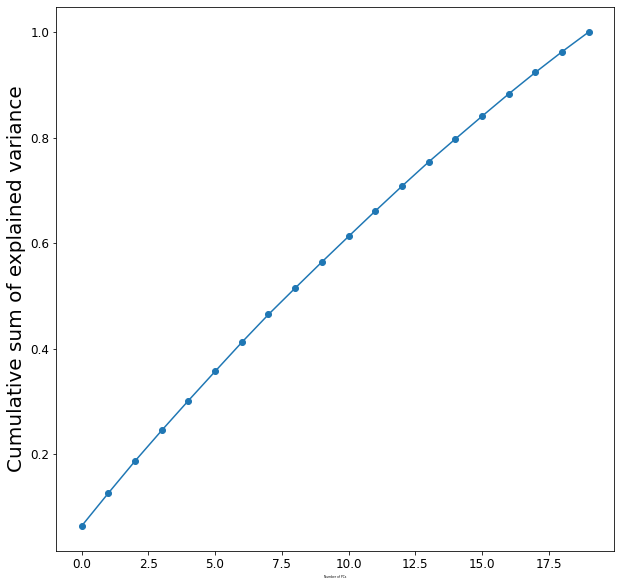

In [89]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('Number of PCs', fontsize=3)
plt.ylabel('Cumulative sum of explained variance' , fontsize=20);

Most variance is explained with 16 principal components. But for practicality we will use only 3.

In [91]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [121]:
for row in principalDf.sort_values(by='principal component 1', ascending=False).head(10).iterrows():
    print("Game_Toy: {} with PC value = {}".format(trainset.to_raw_iid(row[0]), row[1][0]))

AttributeError: 'DataFrame' object has no attribute 'to_raw_iid'

In [129]:
for row in principalDf.sort_values(by='principal component 2', ascending=False).head(10).iterrows():
    print("Game_Toy: {} with PC value = {}".format(trainset.to_raw_iid(row[0]), row[1][1]))

NameError: name 'trainset' is not defined

In [49]:
for row in principalDf.sort_values(by='principal component 3', ascending=False).head(10).iterrows():
    print("Game_Toy: {} with PC value = {}".format(trainset.to_raw_iid(row[0]), row[1][2]))

AttributeError: 'DataFrame' object has no attribute 'to_raw_iid'

AttributeError: 'DataFrame' object has no attribute 'to_raw_iid'

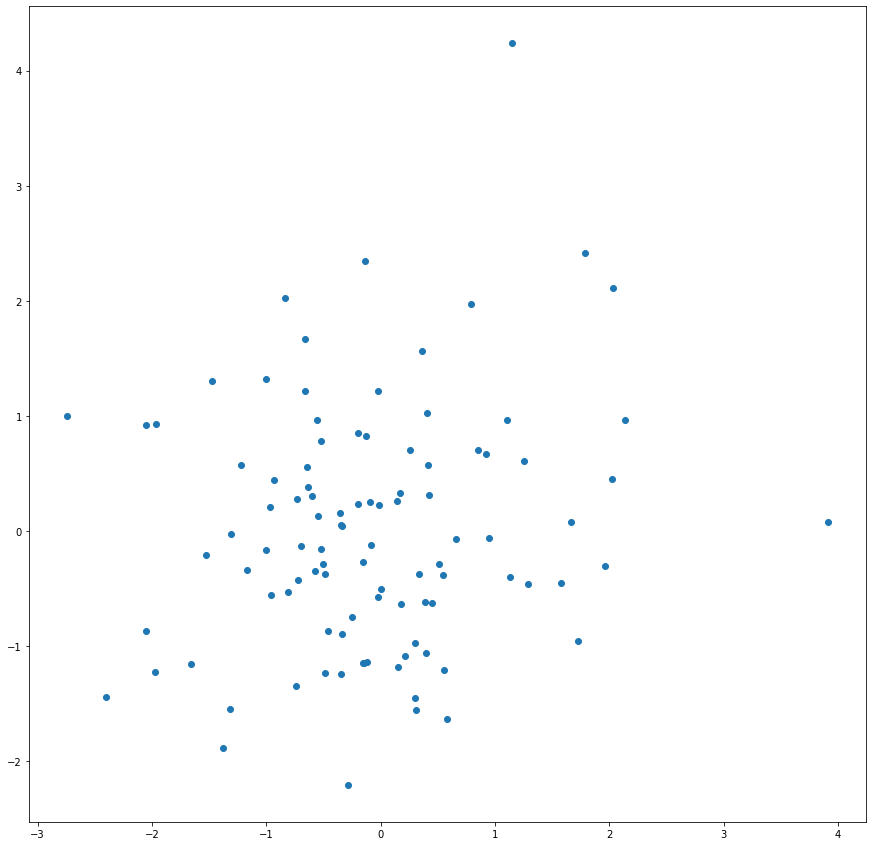

In [51]:
# Taking randomly just 100 games or toys to avoid overcrowding the plot
idxs = np.random.choice(len(principalDf), 100, replace=False) 
idxs = list(range(100))

# Represent the game_toys according to the principal components
X = principalDf.iloc[idxs]['principal component 1'].values
Y = principalDf.iloc[idxs]['principal component 2'].values

# Plot the game_toys
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip([trainset.to_raw_iid(idx) for idx in idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

# CONTENT BASED - Textual Features

## Creating a TF-IDF Vectorizer

In [102]:
from sklearn.metrics.pairwise import linear_kernel 
from sklearn.feature_extraction.text import TfidfVectorizer

In [103]:
# Unifying the title and feedback of the user into 1 column to rate everything together
df['feedback'] = df['summary'] + " - " + df['reviewText']

In [107]:
text_filtering = df[['asin','feedback']]

text_filtering = text_filtering.reset_index(drop=True)

# Choosing a smaller size, otherwise the Kernel breaks in creating the dictionary with the scores
# text_filtering = text_filtering.iloc[:500]

text_filtering

,asin,feedback
0,B00005MP02,Great Family Game - My whole family enjoys thi...
1,B0064Z54Z6,"cool toys, but a little tough for very young h..."
2,B001N4RAJG,And He Has The Power! - Hey It's Sunnydale Chi...
3,B0028K2Q8O,Fun game - We played this with our almost 6 ye...
4,B005E7A202,Cartoonish Campfire Captures the Kids' Imagina...
...,...,...
4891,B007HVGD6K,Cute set. - Goes well with the Servin Surprise...
4892,B001W2WKS0,Very good idea to teach child to write letters...
4893,B00EAHY1QS,Did not recieve listed item - Nerf Super Soake...
4894,B000197NXM,Good bubble machine - this bubble toy actually...


In [108]:
df.shape

(4896, 29)

In [109]:
tfidf = TfidfVectorizer(analyzer='word', min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(text_filtering['feedback'])

In [110]:
feature_names = tfidf.get_feature_names()
ndf = pd.DataFrame(tfidf_matrix.todense(), columns=feature_names)
ndf

/opt/anaconda3/envs/recommendation_engines/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,00,000,000mah,00usd,01,014725,06,08,10,100,...,zoobles,zoobs,zookeeper,zoology,zoom,zoomer,zooms,zs,zx,zzzzzzzooooooooooooooooooommmmm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05973,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
dict(ndf.sort_values(by=1, ascending=False, axis=1).iloc[1])

{'building': 0.3604696184769703,
 'funky': 0.3444721392552028,
 'wacky': 0.30148322634027336,
 'pieces': 0.25391381277018743,
 'helping': 0.2302992019950827,
 'tough': 0.2282392424464186,
 'pushing': 0.22011427364510947,
 'unique': 0.2169821868979055,
 'trouble': 0.21270919732635596,
 'olds': 0.20061777765388827,
 'mind': 0.19299128941338817,
 'little': 0.18449973360997682,
 'trying': 0.18053013286553457,
 'young': 0.1614410110031735,
 'hands': 0.1593157722773305,
 'definitely': 0.15601168439672267,
 'cool': 0.1523831224798617,
 'bit': 0.13714794835039773,
 'lot': 0.12741191377751027,
 'toys': 0.1250441476637957,
 'don': 0.11743411671170263,
 'really': 0.09938414484681858,
 'year': 0.09290753261949497,
 'like': 0.09212584072700311,
 'toy': 0.09096679464898474,
 'fun': 0.0851933051637698,
 'pots': 0.0,
 'potter': 0.0,
 'potluck': 0.0,
 'potties': 0.0,
 '00': 0.0,
 'potty': 0.0,
 'pottying': 0.0,
 'pouch': 0.0,
 'pounce': 0.0,
 'potions': 0.0,
 'pound': 0.0,
 'pounded': 0.0,
 'pounding':

## Cosine Similarity

In [113]:
# Compute cosine similarity
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [115]:
# Iterate over the items in the dataset to find the most similar ones to each one
results = {}
for idx, row in text_filtering.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1] 
    similar_items = [(cosine_similarities[idx][i], text_filtering['asin'][i]) for i in similar_indices] 
    results[row['asin']] = similar_items[1:]

In [116]:
def item(id):  
    return text_filtering.loc[text_filtering['asin'] == id]['feedback'].tolist()[0].split(' - ')[0] 

# Just reads the results out of the dictionary
def recommend(item_id, num):
    print("Recommending " + str(num) + " products similar to " + item(item_id) + "...")   
    print("-------")
    recs = results[item_id][:num]   
    for rec in recs: 
        print("Recommended: " + item(rec[1]) + " (score:" +      str(rec[0]) + ")")

In [118]:
recommend(item_id='B00005MP02', num=5)

Recommending 5 products similar to Great Family Game...
-------
Recommended: Wrap your mind around Word A Round (score:0.2675524574169914)
Recommended: Fun game! (score:0.26589190122646716)
Recommended: Great game (score:0.2576253152928714)
Recommended: Great for the early reader arsenal! (score:0.25454205899653437)
Recommended: Competitive, fast-paced cross-word game (score:0.24855480032204663)
